In [1]:
from zoedepth.models.builder import build_model
from zoedepth.utils.config import get_config

# ZoeD_N
conf = get_config("zoedepth", "infer")
model_zoe_n = build_model(conf)

C:\Users\daimonyuusuke\anaconda3\envs\zoe\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


img_size [384, 512]


C:\Users\daimonyuusuke\anaconda3\envs\zoe\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to C:\Users\daimonyuusuke/.cache\torch\hub\master.zip
C:\Users\daimonyuusuke\anaconda3\envs\zoe\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C

Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt


Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt" to C:\Users\daimonyuusuke/.cache\torch\hub\checkpoints\ZoeD_M12_N.pt
100%|███████████████████████████████████████████████████████████| 1.34G/1.34G [03:42<00:00, 6.49MB/s]


Loaded successfully


In [2]:
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
zoe = model_zoe_n.to(DEVICE)

In [4]:
zoe

ZoeDepth(
  (core): MidasCore(
    (core): DPTDepthModel(
      (pretrained): Module(
        (model): Beit(
          (patch_embed): PatchEmbed(
            (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
            (norm): Identity()
          )
          (pos_drop): Dropout(p=0.0, inplace=False)
          (blocks): ModuleList(
            (0): Block(
              (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
              (attn): Attention(
                (qkv): Linear(in_features=1024, out_features=3072, bias=False)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=1024, out_features=1024, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=1024, out_features=4096, bias=True)
     

In [4]:
from PIL import Image
path=r"C:\Users\daimonyuusuke\Downloads\ZoeDepth-main\ZoeDepth-main\131219.png"
image = Image.open(path).convert("RGB")  # load
depth_numpy = zoe.infer_pil(image)  # as numpy

depth_pil = zoe.infer_pil(image, output_type="pil")  # as 16-bit PIL Image

depth_tensor = zoe.infer_pil(image, output_type="tensor")  # as torch tensor



# Tensor 
from zoedepth.utils.misc import pil_to_batched_tensor
X = pil_to_batched_tensor(image).to(DEVICE)
depth_tensor = zoe.infer(X)


tensor([[[[2.6270, 2.6293, 2.6310,  ..., 2.4597, 2.4578, 2.4553],
          [2.6387, 2.6410, 2.6428,  ..., 2.4692, 2.4673, 2.4647],
          [2.6462, 2.6486, 2.6503,  ..., 2.4753, 2.4733, 2.4708],
          ...,
          [2.4693, 2.4718, 2.4737,  ..., 2.6673, 2.6655, 2.6629],
          [2.4652, 2.4677, 2.4696,  ..., 2.6628, 2.6610, 2.6584],
          [2.4587, 2.4612, 2.4631,  ..., 2.6559, 2.6540, 2.6515]]]],
       device='cuda:0', grad_fn=<DivBackward0>)

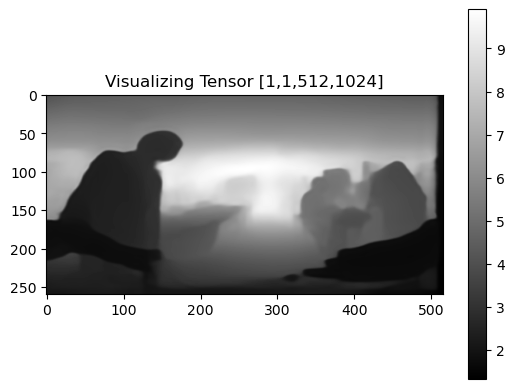

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt



# GPUからCPUに移動し、勾配を切り離してからNumPy配列に変換
image = depth_tensor.cpu().detach().squeeze().numpy()
# 画像を可視化
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Visualizing Tensor [1,1,512,1024]')
plt.show()
